Małgorzata Gierdewicz id: 148264

# Stemming, lemmatization

After scraping the wikipedia with the scrapy spider, I load the data with text and prepare it for further analysis. Stemming and Lemmarizationare performed with other data cleaning steps such as removal of newlines or punctuation.

In [41]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv('wikitest.csv')
df.head()

,sample_text,title,url
0,is a 19th-century castle built above the villa...,Main Page,https://en.wikipedia.org/wiki/Main_Page
1,"An ( L., from meaning ""onion""), also known as ...",Onion,https://en.wikipedia.org/wiki/Onion
2,"(also known as , , , , , and) is an species of...",NaN,https://en.wikipedia.org/wiki/Allium_chinense
3,", the , also commonly called , , , and , is a ...",NaN,https://en.wikipedia.org/wiki/Allium_fistulosum
4,", scientific name , is a species of in the fam...",Chives,https://en.wikipedia.org/wiki/Chives


In [16]:
import nltk

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


from nltk.tokenize import word_tokenize, wordpunct_tokenize

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('punkt_tab')

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text, remove_stopwords=True):


    if not isinstance(text, str):
        text = str(text)

    text = text.lower()

    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)

    tokens = word_tokenize(text)

    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    cleaned_text = ' '.join(tokens)
    return cleaned_text


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
for i in range(len(df['sample_text'])):
    df['sample_text'][i] = clean_text(df['sample_text'][i])
df.head()


<ipython-input-44-60b1dc3feac0>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['sample_text'][i] = clean_text(df['sample_text'][i])


,sample_text,title,url
0,castl built villag first castl site built norm...,Main Page,https://en.wikipedia.org/wiki/Main_Page
1,l mean onion also known veget wide cultiv spec...,Onion,https://en.wikipedia.org/wiki/Onion
2,also known speci nativ cultiv mani countri clo...,NaN,https://en.wikipedia.org/wiki/Allium_chinense
3,also commonli call speci often consid kind spe...,NaN,https://en.wikipedia.org/wiki/Allium_fistulosum
4,scientif name speci famili plant widespread na...,Chives,https://en.wikipedia.org/wiki/Chives


In [45]:
df

,sample_text,title,url
0,castl built villag first castl site built norm...,Main Page,https://en.wikipedia.org/wiki/Main_Page
1,l mean onion also known veget wide cultiv spec...,Onion,https://en.wikipedia.org/wiki/Onion
2,also known speci nativ cultiv mani countri clo...,NaN,https://en.wikipedia.org/wiki/Allium_chinense
3,also commonli call speci often consid kind spe...,NaN,https://en.wikipedia.org/wiki/Allium_fistulosum
4,scientif name speci famili plant widespread na...,Chives,https://en.wikipedia.org/wiki/Chives
...,...,...,...
3266,hello notic want welcom wikipedia commun hope ...,35.139.154.158,https://en.wikipedia.org/wiki/User_talk:35.139...
3267,galleri includ may place userbox templat multi...,Userboxes/Tea,https://en.wikipedia.org/wiki/Wikipedia:Userbo...
3268,caution icon click datetim view file appear ti...,NaN,https://en.wikipedia.org/wiki/File:Diamond-cau...
3269,galleri includ may place userbox templat multi...,Userboxes/Games/Video games/Nintendo,https://en.wikipedia.org/wiki/Wikipedia:Userbo...


# Similarities

The Scoring algorithm is simple, using in-build libraries to perform TF-IDF to measure the importance of a term within a specific document [TF], measure the importance of a term across the entire corpus [IDF], and then
give higher weight to terms that are frequent in a document but rare in the corpus by combining TF and IDF. Then it measures how similar the user input is with the sample text from documents [cosine similarity], and recommends 5 articles with the highest score (most similar to query) to the user.


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


user_input = ['Mother', 'Oil', 'French']

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['sample_text'])
user_vector = vectorizer.transform(user_input)
similarities = cosine_similarity(user_vector, tfidf_matrix)

for j in range(len(user_input)):
  ranked_indices = similarities.argsort()[j][::-1]
  top_n = 5
  recommended_documents = [df['url'][i] for i in ranked_indices[:top_n]]
  results_dict = {}
  for doc in recommended_documents:
      results_dict[doc] = similarities[j][ranked_indices[recommended_documents.index(doc)]]
  print(results_dict)



{'https://en.wikipedia.org/wiki/Elizabeth_Dudley_(Quaker)': 0.20383768683206885, 'https://en.wikipedia.org/wiki/Category_talk:Mathematician_stubs': 0.1994364969599684, 'https://en.wikipedia.org/wiki/Category:Isis': 0.152985053803541, 'https://en.wikipedia.org/wiki/Kimidori_Ribbon_Project': 0.15132621696629814, 'https://en.wikipedia.org/wiki/Zeenat_(1975_film)': 0.1284150508392206}
{'https://en.wikipedia.org/wiki/The_King_of_Oil:_The_Secret_Lives_of_Marc_Rich': 0.2566210162761741, 'https://en.wikipedia.org/wiki/User:Souichirouumeda~enwiki': 0.25078073690927893, 'https://en.wikipedia.org/wiki/Naraka_Chaturdashi': 0.21759478010595684, 'https://en.wikipedia.org/wiki/Tempering_(spices)': 0.1704778731466217, 'https://en.wikipedia.org/wiki/Juniperus_osteosperma': 0.0928094254497245}
{'https://en.wikipedia.org/wiki/Croix_de_guerre_1939-1945': 0.3750050490182319, 'https://en.wikipedia.org/wiki/Andr%C3%A9_Charles_Victor_Reille': 0.2477322392360848, 'https://en.wikipedia.org/wiki/Erick_Zonca': 0.

# Statistics

Most frequent words

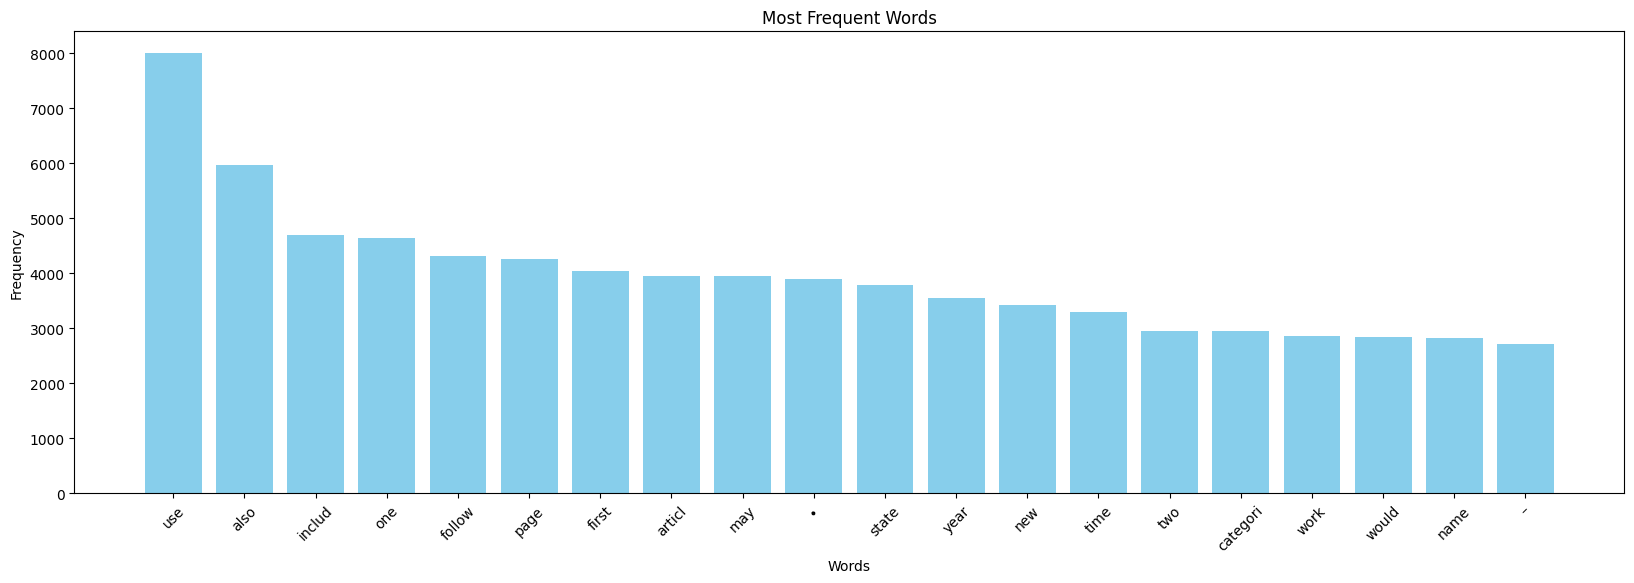

In [70]:
from collections import Counter
import matplotlib.pyplot as plt

all_text = ' '.join(df['sample_text'].astype(str))
words = all_text.split()
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)
words, counts = zip(*most_common_words)

plt.figure(figsize=(20, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Frequent Words')
plt.xticks(rotation=45)
plt.show()